In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/aashish/Desktop/ML-pyhton/Wine.csv')
df.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1


In [2]:
df.tail(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.size

2492

In [7]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=df.drop(['Customer_Segment'], axis =1 )
y=df.iloc[:,-1]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_scarray=sc.transform(X)
X_sc=pd.DataFrame(X_scarray, columns = X.columns)
X_sc.sample(3)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,-0.778980,-1.253450,-3.679162,-2.671018,-0.824415,-0.504914,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540
123,0.061000,3.109192,-0.864550,0.602088,-0.964842,0.520578,0.623193,-0.498407,0.734300,-1.063296,-0.997898,0.689716,-1.168369
160,-0.791333,1.340796,0.049285,0.451946,-0.824415,0.007832,-1.113670,1.113154,-0.965221,1.121183,-1.743745,-1.457197,-0.722540


# K-MEANS CLUSTRING

there are various methods of doing this by guessing the value of k , or by within cluster sum of squares or by silhouette score. We will be using the silhouette score method as it gives us a correct/optimal value of k beforehand.

# Silhouette score calculation


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
for n_cluster in range(2,16):
    silhouette_scores.append(silhouette_score(X_sc, KMeans(n_clusters = n_cluster).fit_predict(X_sc))) 

Plotting a bar graph to compare the results  

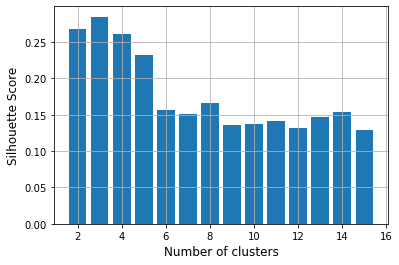

In [33]:
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 12) 
plt.ylabel('Silhouette Score', fontsize = 12) 
plt.grid()
plt.show()

as the silhouette scores is highest when k=3 we will take it and do the k-means clustring for k=3

In [53]:
nclusters = 3 # this is the k in k-means
seed = 0
km = KMeans(n_clusters=nclusters,init='k-means++', random_state=seed)
km.fit(X_sc.values)

# predict the cluster for each data point
y_cluster_kmeans_final3 = km.fit_predict(X_sc.values)
y_cluster_kmeans_final3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [54]:
from sklearn import metrics
score = metrics.silhouette_score(X_sc, y_cluster_kmeans_final3)
score

0.28594199657074876

In [46]:
km.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.93900326, -0.39196582, -0.43920097,  0.20898793, -0.46377382,
        -0.05334831,  0.06690377, -0.01982215,  0.06479192, -0.88207529,
         0.45298189,  0.28973833, -0.75602559],
       [ 0.87809728, -0.30457633,  0.31894179, -0.66452366,  0.56488825,
         0.87650546,  0.94363903, -0.58558981,  0.58178294,  0.16718842,
         0.48372814,  0.76705349,  1.15834713]])

Now lets increase or decrease he values of k from 3 and see the score

K=2


In [47]:
nclusters = 2 # this is the k in k-means
seed = 0
km = KMeans(n_clusters=nclusters,init='k-means++', random_state=seed)
km.fit(X_sc.values)

# predict the cluster for each data point
y_cluster_kmeans = km.fit_predict(X_sc.values)
y_cluster_kmeans
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [48]:
from sklearn import metrics
score = metrics.silhouette_score(X_sc, y_cluster_kmeans)
score

0.2683134097105213

K=4


In [51]:
nclusters = 4 # this is the k in k-means
seed = 0
km = KMeans(n_clusters=nclusters,init='k-means++', random_state=seed)
km.fit(X_sc.values)

# predict the cluster for each data point
y_cluster_kmeans = km.fit_predict(X_sc.values)
y_cluster_kmeans
y_cluster_kmeans

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [52]:
from sklearn import metrics
score = metrics.silhouette_score(X_sc, y_cluster_kmeans)
score

0.25173343011696475

# as you can see as we go from 3 clusters to 2 or 4 clusters the silhouette score decreases therefore the best/optimal number of clusters is 3(THREE)

NOW lets Visualize all the clusters

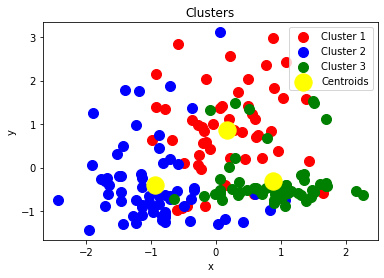

In [60]:
plt.scatter(X_sc.values[y_cluster_kmeans_final3 == 0, 0], X_sc.values[y_cluster_kmeans_final3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_sc.values[y_cluster_kmeans_final3 == 1, 0], X_sc.values[y_cluster_kmeans_final3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_sc.values[y_cluster_kmeans_final3 == 2, 0], X_sc.values[y_cluster_kmeans_final3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# ALGOMARATIVE METHOD OF CLUSTRING

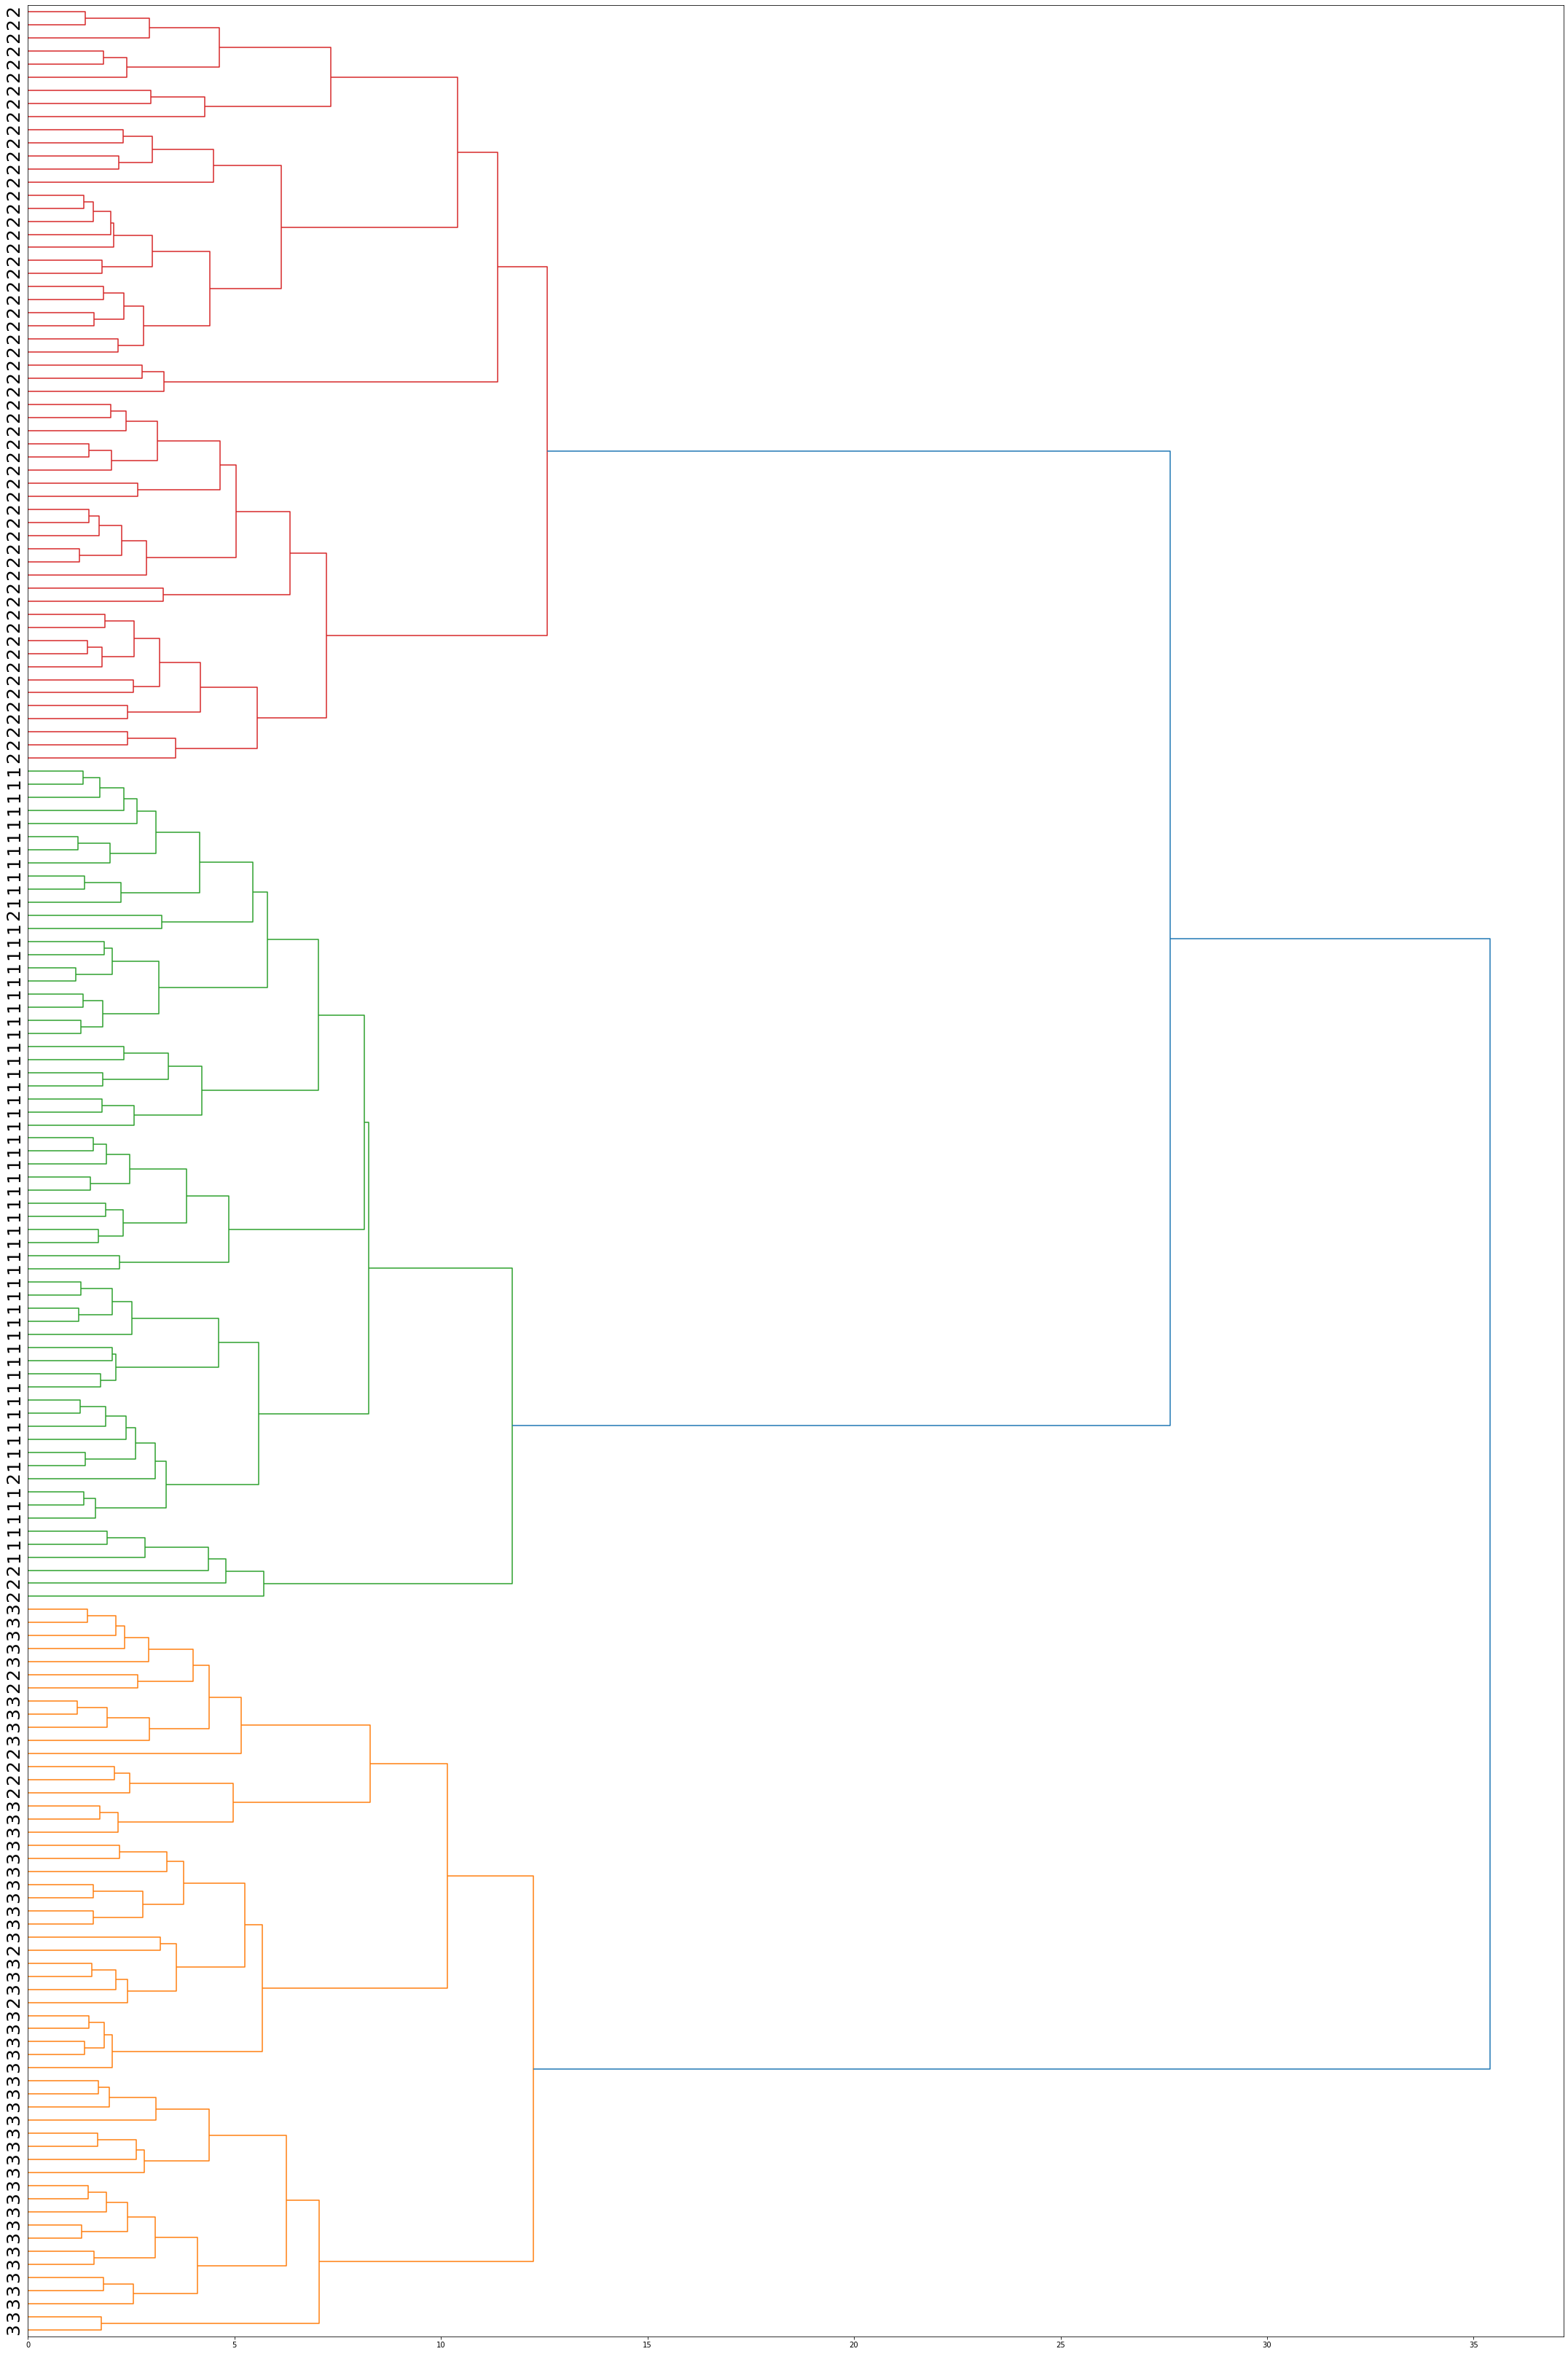

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
X_sc=np.array(X_sc)
Z=linkage(X_sc,method="ward")
#Plot a Dendogram
fig, ax = plt.subplots(figsize=(30, 45))
ax=dendrogram(Z,orientation="right",labels=np.array(df['Customer_Segment']),leaf_rotation=90,leaf_font_size=25)
plt.tight_layout()
plt.show()